# Aprendizaje Profundo para datos textuales

## Contenido

* [Introducción](#Introducción)
* [Sumergimiento o incrustamiento de palabras-word embeddings](#Sumergimiento-o-incrustamiento-de-palabras-word-embeddings)
* [No cuente, prediga](#No-cuente,-prediga)
* [Importa librerías](#Importa-librerías)
* [Recursos linguísticos](#Recursos-linguísticos)
* [Corpus de juguete](#Corpus-de-juguete)
* [Ejemplo The King James version of the Bible](#Ejemplo-The-King-James-Version-of-the-Bible)
* [El modelo Word2vec](#El-modelo-Word2vec)
* [Recuperación del encrustamiento (embedding)](#Recuperación-del-encrustamiento-(embedding))
* [Calcula palabras similares](#Calcula-palabras-similares)
* [Modelo Skip-gram](#Modelo-Skip-gram)
* [Palabras similares](#Palabras-similares)
* [Gráfico usando TSNE](#Gráfico-usando-TSNE)
* [Aplicación a etiquetado automático de textos](#Aplicación-a-etiquetado-automático-de-textos)


## Introducción

Trabajar con datos de texto no estructurados es difícil, especialmente cuando se intenta construir un sistema inteligente que interprete y comprenda el lenguaje natural que fluye libremente al igual que los humanos. 


Debe poder procesar y transformar datos textuales no estructurados y ruidosos en algunos formatos estructurados y vectorizados que puedan ser entendidos por cualquier algoritmo de aprendizaje automático. 


Los principios del procesamiento del lenguaje natural, el aprendizaje automático o el aprendizaje profundo, todos los cuales caen bajo el amplio paraguas de la inteligencia artificial, son herramientas eficaces del oficio. 


Un punto importante a recordar aquí es que cualquier algoritmo de aprendizaje automático se basa en principios de estadística, matemáticas y optimización. 

Por lo tanto, no son lo suficientemente inteligentes como para comenzar a procesar texto en su forma original y sin procesar. 

En esta sesión, analizaremos funciones que a menudo aprovechan los modelos de aprendizaje profundo. Más específicamente, cubriremos los modelos **Word2Vec, GloVe y FastText**.

## Sumergimiento o incrustamiento de palabras-word embeddings

Con respecto a los sistemas de reconocimiento de voz o imágenes, toda la información ya está presente en forma de vectores de características ricos y densos incrustados en conjuntos de datos de alta dimensión como espectrogramas de audio e intensidades de píxeles de imagen, como hemos estudiado en otras lecciones.

<figure>
<center>
<img src="../Imagenes/pixels.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura del modelo CBOW con una palabra de contexto</p>
</figcaption>
</figure>


Sin embargo, cuando se trata de datos de texto sin procesar, especialmente modelos basados en conteo como la bolsa de palabras (bag of words), estamos tratando con palabras individuales que pueden tener sus propios identificadores y no capturan la relación semántica entre palabras. 

En la sesión anterior trabajamos con la técnica de bolsa de palabras en la tećnica Lattent Dirichlet Allocation (LDA). 

Esto conduce a enormes vectores de palabras dispersas para datos textuales y, por lo tanto, si no tenemos suficientes datos, podemos terminar obteniendo modelos deficientes o incluso sobreajustando los datos.

## No cuente, prediga

Para superar las deficiencias de perder la semántica y la escasez de características basadas en el modelo de bolsa de palabras, necesitamos hacer uso de los modelos de espacio vectorial - **Vector Space Models**(VSM) de tal manera que podamos incrustar vectores de palabras en este espacio vectorial continuo basado en semánticas y similitud contextual. 


De hecho, la *hipótesis distributiva* en el campo de la *semántica distributiva* nos dice que **las palabras que ocurren y se usan en el mismo contexto, son semánticamente similares entre sí y tienen significados similares**. 


En términos simples, **una palabra se caracteriza por la compañía que mantiene**. Uno de los artículos famosos que habla en detalle sobre estos vectores de palabras semánticas y varios tipos es [Don’t count, predict! A systematic comparison of context-counting vs. context-predicting semantic vectors’ by Baroni et al](https://www.aclweb.org/anthology/P14-1023.pdf), de  by Baroni et al.


No profundizaremos mucho, pero en resumen, hay dos tipos principales de métodos para los vectores de palabras contextuales. 

- **Métodos basados en conteo** como el *Análisis semántico latente* (LSA) que se pueden usar para calcular algunas medidas estadísticas de la frecuencia con la que las palabras ocurren con sus palabras vecinas en un corpus y luego construir vectores de palabras densas para cada palabra a partir de estas medidas. 
- **Los métodos predictivo**s, como los modelos de lenguaje basados en redes neuronales, intentan predecir palabras a partir de las palabras vecinas observando secuencias de palabras en el corpus y, en el proceso, aprende representaciones distribuidas que nos proporcionan densas incrustaciones de palabras. 

Nos centraremos en estos métodos predictivos en esta lección.

## Importa librerías

In [8]:
!pip3 install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.3 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 3.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [9]:
!pip3 install absl-py

In [3]:
#!pip3 install google

In [4]:
#!pip3 install gast

In [5]:
#!pip3 install opt-einsum

In [6]:
#!pip3 install astunparse

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

## Recursos linguísticos

[NLTK](https://www.nltk.org/py-modindex.html) incluye una pequeña selección de textos del archivo de texto electrónico del Proyecto Gutenberg, que contiene unos 25.000 libros electrónicos gratuitos, alojados en [Gutenberg project](http://www.gutenberg.org/)

*Tokenizador de frases Punkt*

Este tokenizador divide un texto en una lista de oraciones mediante el uso de un algoritmo no supervisado para construir un modelo de abreviaturas, colocaciones y palabras que inician oraciones. Debe entrenarse en una gran colección de texto sin formato en el idioma de destino antes de que pueda usarse.

El paquete de datos NLTK incluye un tokenizador Punkt previamente entrenado para inglés.

## Corpus de juguete

Para empezar usaremos el siguiente *toy corpus*

Nuestro corpus de juguetes consta de documentos pertenecientes a varias categorías. 

Otro corpus que usaremos en esta lección es la versión *King James de la Biblia* disponible gratuitamente en *Project Gutenberg* a través del módulo de corpus en nltk.

Lo cargaremos en breve, en la siguiente sección. Antes de los análisis necesitamos preprocesar y normalizar este texto.

In [8]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## Pre-procesamiento del texto

In [9]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # remove special characters: 
    #re.I stands for "ignore case," which means the regular expression will be case-insensitive when matching characters. 
    #re.A stands for "ASCII-only matching," which means to perform the matching based only on ASCII characters, ignoring any non-ASCII characters.
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # transform to lower case
    doc = doc.lower()
    # remove \whitespaces
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

# crea una función vectorizada para que actué sobre múltiples textos
normalize_corpus = np.vectorize(normalize_document)
#normalize_corpus

In [10]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Ejemplo The King James Version of the Bible 

In [11]:
## Holy Bible, Authorized (King James) Version, Textfile 930105.
## Ge1:1 In the beginning God created the heaven and the earth.
## Ge1:2 And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. 


In [12]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [13]:
from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt') # tokeniza por sentencias
remove_terms = punctuation + '0123456789'

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])


Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


## El modelo Word2vec


Este modelo fue creado por Google en 2013. Para los detalles consulte  [Distributed Representations of Words and Phrases
and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) y [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf). 

Una explicación sencilla puede encontrarse en [word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738.pdf), 

**Word2vec** es un modelo de aprendizaje profundo para generar distribuciones vectoriales continuas  de palabras, con una   alta calidad, que capturan similitudes contextuales y semánticas. 


Básicamente, se trata de modelos no supervisados (en el fondo son autoencoders) que pueden incluir corpus textuales masivos, crear un vocabulario de palabras posibles y generar incrustaciones (embbedings) para cada palabra en el espacio vectorial que representa ese vocabulario. 

Por lo general, se puede especificar el tamaño de los vectores de sumergimiento de palabras y el número total de vectores es esencialmente el tamaño del vocabulario. 

Esto hace que la dimensionalidad de este espacio vectorial denso sea mucho menor que el espacio vectorial disperso de alta dimensión construido con los modelos tradicionales de Bag of Words.


Hay dos arquitecturas de modelos diferentes que Word2Vec puede aprovechar para crear estas representaciones de incrustación de palabras. Éstos incluyen,

- modelo *cbow*
- modelo *skip-gram*


Supongamos que se ha obtenido la siguiente codificación word2vec para personajes de comics.

word2vec(‘Batman’) = [0.9, 0.8, 0.2]

word2vec(‘Joker’) = [0.8, 0.3, 0.1]

word2vec(‘Spiderman’) = [0.2, 0.9, 0.8]

word2vec(‘Thanos’) = [0.3, 0.1, 0.9]

1. Parece que la primera característica representa la pertenencia al Universo DC. Observa que "Batman" y "Joker" tienen valores más altos para su primera función porque pertenecen al Universo DC.
2. Quizás el segundo elemento en la representación de word2vec aquí captura las características de héroe / villano. Es por eso que "Batman" y "Spiderman" tienen valores más altos y "Joker" y "Thanos" tienen valores más pequeños.
3. Se podría decir que el tercer componente de la palabra vectores representa los poderes / habilidades sobrenaturales. Todos sabemos que "Batman" y "Joker" no tienen superpoderes y es por eso que sus vectores tienen números pequeños en la tercera posición.


<figure>
<center>
<img src="../Imagenes/word2vec-models.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura word2vec</p>
</figcaption>
</figure>

Fuente: 
[wor2vec arquitecture](https://figshare.com/articles/figure/_i_Word2Vec_i_architecture_The_figure_shows_two_variants_of_word2vec_architecture_CBOW_and_Skip_gram_26_for_a_sample_/11982951)


# Modelo CBOW

CBOW = Continuous Bag of Words


Con la arquitectura del modelo CBOW se intenta predecir la palabra objetivo actual- target word- (la palabra central) basándose en las palabras del contexto de origen (palabras circundantes). Consideremos una oración simple en inglés: “the quick brown fox jumps over the lazy dog”

Aquí se consideran pares de (context_window, target_word) donde si consideramos una ventana de contexto de tamaño 2, tenemos ejemplos como ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) y así sucesivamente. 

Por lo tanto, el modelo intenta predecir la palabra_destino (target_word) basándose en las palabras de la ventana de contexto (context_window).

El siguiente gráfico ilustra la arquitectuta CBW. Cada plabra en la entrada está codificada usando la codificación one-hot. 

Para lograr esto, el diccionario de palabras es construído previamente y en consecuencia, cada palabra es representada por un vector binario de tamaño igual al tamaño del diccionario.




<figure>
<center>
<img src="../Imagenes/cbow_1_palabra.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura del modelo CBOW con una palabra de contexto</p>
</figcaption>
</figure>



La siguiente imagen es la arquitectura general CBOW.


<figure>
<center>
<img src="../Imagenes/CBOW.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura general del modelo CBOW</p>
</figcaption>
</figure>

Fuente: 
[Efficient Estimation of Word Representations in Vector space](https://arxiv.org/pdf/1301.3781.pdf)

La familia de modelos Word2Vec no es supervisada, lo que esto significa es que puede simplemente darle un corpus sin etiquetas o información adicionales y puede construir incrustaciones densas de palabras a partir del corpus. 

Pero aún necesitará aprovechar una metodología de clasificación supervisada una vez que tenga este corpus para acceder a estas incorporaciones. 

Haremos esto desde el propio corpus, sin ninguna información auxiliar. Podemos modelar esta arquitectura CBOW ahora como un modelo de clasificación de aprendizaje profundo de modo que tomemos en las palabras de contexto como nuestra entrada, $X$ e intentemos predecir la palabra objetivo, $Y$. 

## Implementación de CBOW

### Vocabulario

In [14]:
#!pip3 install --upgrade tensorflow

In [15]:
!pip3 install --upgrade keras

                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 320.0 kB/s eta 0:00:06
     ------------                             0.6/1.7 MB 7.0 MB/s eta 0:00:01
     ----------------------------------       1.5/1.7 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


In [16]:
import tensorflow as tf
import keras as keras

print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [17]:
import tensorflow as tf
from keras.preprocessing import text
#from tensorflow.keras.utils import np_utils
from keras.utils import to_categorical 
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}

# docs as nested lists of id's of words
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:20])
print('list of numeric sequences: ',wids[:10])
print('id2word ',list(id2word.items())[:20])

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10), ('man', 11), ('israel', 12), ('king', 13), ('son', 14), ('hath', 15), ('people', 16), ('came', 17), ('house', 18), ('come', 19), ('one', 20)]
list of numeric sequences:  [[13, 1154, 5766], [154, 2450, 13, 1154, 5766], [132, 310, 63, 86, 8480], [582, 6, 1180, 94, 47], [47, 136, 1883, 1884, 396, 10, 144, 860], [111, 6, 759, 10, 144, 212], [6, 8, 27, 232, 232], [6, 101, 232, 75, 6, 826, 232, 396], [6, 86, 232, 23, 396, 86, 197], [926, 287, 132, 23]]
id2word  [(1, 'shall'), (2, 'unto'), (3, 'lord'), (4, 'thou'), (5, 'thy'), (6, 'god'), (7, 'ye'), (8, 'said'), (9, 'thee'), (10, 'upon'), (11, 'man'), (12, 'israel'), (13, 'king'), (14, 'son'), (15, 'hath'), (16, 'people'), (17, 'came'), (18, 'house'), (19, 'come'), (20, 'one')]


Por lo tanto, puede ver que hemos creado un vocabulario de palabras únicas en nuestro corpus y también formas de asignar una palabra a su identificador único y viceversa. El término PAD se usa típicamente para rellenar palabras de contexto a una longitud fija si es necesario.


### Construcción del generador CBOW (contex,target)

Necesitamos pares que consistan en una palabra central objetivo y palabras de contexto circundantes. 

En nuestra implementación, una palabra de destino tiene una longitud de 1 y el contexto circundante tiene una longitud de 2 x tamaño de ventana, donde tomamos las palabras de tamaño de ventana antes y después de la palabra de destino en nuestro corpus. 


Esto quedará más claro con el siguiente ejemplo.

In [18]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            #print("start:",start)
            end = index + window_size + 1
            #print("end:",end)
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


### Construye la arquitectura neuronal CBOW

Las  entradas serán nuestras palabras de contexto que se pasan a una capa de incrustación (inicializada con pesos aleatorios). 

Las incrustaciones de palabras se propagan a una capa lambda donde promediamos las incrustaciones de palabras (por esta razón, se llama CBOW porque realmente no consideramos el orden o la secuencia en las palabras de contexto cuando se promedian) y luego pasamos esta incrustación de contexto promediada a una capa densa con  activación que predice nuestra palabra objetivo (target).

Observe que al promediar es como si calcularamos una palabra promedio que pasa la capa densa para que la compare con la palabra target $Y$.

Calculamos la pérdida usando la entropía cruzada.

In [19]:

import tensorflow as tf
from keras.layers import Input, Dense, Embedding, Lambda
from keras.models import Model
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError



In [20]:
!pip install pydot
!pip install graphviz

Model: "cbow_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cbow_input (InputLayer)     [(None, 4)]               0         
                                                                 
 embedding (Embedding)       (None, 4, 100)            1242500   
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 12425)             1254925   
                                                                 
Total params: 2497425 (9.53 MB)
Trainable params: 2497425 (9.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


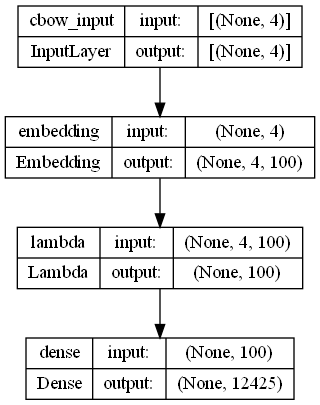

In [21]:
#cbow
inputs = Input(shape=(window_size*2,),name='cbow_input')
x = Embedding(input_dim= vocab_size, output_dim=embed_size, input_length=window_size*2)(inputs)
x = Lambda(lambda x: tf.reduce_mean(x, axis=1), output_shape=(embed_size,))(x)
outputs = Dense(vocab_size, activation='softmax')(x)
cbow = Model(inputs=inputs,outputs=outputs, name='cbow_model')

cbow.summary()
plot_model(cbow, to_file='../Imagenes/cbow.png', 
           show_shapes=True)


In [22]:
# compile
cbow.compile(loss='categorical_crossentropy', optimizer='adam')

La gráfica muestra la arquitectura neuronal CBOW


<figure>
<center>
<img src="../Imagenes/CBOW_net_arq.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura de la red para el modelo CBOW</p>
</figcaption>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)

In [23]:
wids[0:2]

[[13, 1154, 5766], [154, 2450, 13, 1154, 5766]]

In [24]:
# train: time expensive: AWS,..., colab...

for epoch in range(1, 2):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 1 	Loss: 2866908.2105163964



## Recuperación del encrustamiento (embedding)

In [25]:
# recuperando el incrustamiento (embedding)
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(12424, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
unto,0.384858,-0.189373,0.422140,0.328913,-0.575041,-0.348318,0.580141,0.536797,-0.452355,0.432372,...,0.164141,-0.127167,-0.541331,-0.578425,-0.202790,-0.109534,0.289264,-0.558429,-0.321684,-0.312310
lord,0.254768,-0.542316,0.485667,0.621735,-0.446113,-0.521699,0.611683,0.479109,-0.599574,-0.145916,...,0.458758,-0.253614,-0.627309,-0.263637,-0.172744,-0.763224,0.352998,-0.380518,-0.275213,-0.224129
thou,0.623153,-0.373838,0.529875,0.530800,-0.729703,-0.509811,0.417767,0.069821,-0.255070,0.364908,...,0.743005,-0.383708,-0.360369,-0.543971,-0.336692,-0.544966,0.516058,-0.143035,-0.422691,-0.503014
thy,0.741849,-0.583461,0.641747,0.268993,-0.503505,-0.771524,0.797991,0.277864,-0.443694,0.562718,...,0.519439,0.044742,-0.513411,-0.654028,-0.523124,-1.012322,0.605268,-0.457163,-0.512346,-0.395641
god,-0.063553,-0.347638,0.646309,0.540859,-0.603718,-0.219817,0.749148,0.368255,-0.660937,0.118629,...,0.576444,-0.708801,-0.406054,-0.589235,-0.385487,-0.807643,0.374925,0.023639,-0.426025,-0.271158


<figure>
<center>
<img src="../Imagenes/CBOW_coordinates.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Embedding de algunas palabras en el modelo CBOW</p>
</figcaption>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)

## Calcula palabras similares

In [26]:
!pip3 install scikit-learn

In [27]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

similar_words

(12424, 12424)


{'god': ['preaching', 'asia', 'preach', 'also', 'liberty'],
 'jesus': ['knowing', 'apostle', 'beginning', 'baptism', 'crucified'],
 'noah': ['tirzah', 'abigail', 'hebronites', 'rehob', 'shemiramoth'],
 'egypt': ['tyre', 'damascus', 'strangers', 'company', 'ships'],
 'john': ['apostle', 'simon', 'paul', 'sister', 'knowing'],
 'gospel': ['preach', 'governor', 'preaching', 'synagogues', 'preached'],
 'moses': ['perceived', 'present', 'desired', 'asia', 'andrew'],
 'famine': ['best', 'wounded', 'jozabad', 'whereon', 'malluch']}

## Modelo Skip-gram 

La arquitectura del modelo Skip-gram generalmente intenta lograr lo contrario de lo que hace el modelo CBOW. 


Intenta predecir las palabras de contexto de origen (palabras circundantes) dada una palabra de destino (la palabra central). Teniendo en cuenta nuestra simple oración de antes, "the quick brown fox jumps over the lazy dog”. 

Si usamos el modelo CBOW, obtenemos pares de (context_window, target_word) donde si consideramos una ventana de contexto de tamaño 2, tenemos ejemplos como ([quick, fox], brown), ([the, brown], quick) , ([the, dog], lazy) y así sucesivamente. 

Ahora, teniendo en cuenta que el objetivo del modelo *skip-gram* es predecir el contexto a partir de la palabra objetivo, el modelo normalmente invierte los contextos y objetivos e intenta predecir cada palabra de contexto a partir de su palabra objetivo. 

Por lo tanto, la tarea se convierte en predecir el contexto [quick, fox] dada la palabra objetivo *brown* o [the brown] dada la palabra objetivo *quick* y así sucesivamente. 

Por lo tanto, el modelo intenta predecir las palabras de la ventana context_window basándose en target_word.

La figura ilustra la qrtuitectuta skip-gram


<figure>
<center>
<img src="../Imagenes/SKIP_gram.png" width="300" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Modelo Skip-gram</p>
</figcaption>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)


Para esto, alimentamos nuestros pares de modelos de skip-gram son $(X, Y)$ donde $X$ es nuestra entrada e $Y$ es nuestra etiqueta. 

Hacemos esto usando los pares [(objetivo, contexto), 1]  como muestras de entrada positivas donde objetivo es nuestra palabra de interés y contexto es una palabra de contexto que aparece cerca de la palabra objetivo y la etiqueta positiva 1 indica que este es un par contextualmente relevante. 


También introducimos pares [(objetivo, aleatorio), 0] como muestras de entrada negativa donde objetivo es nuevamente nuestra palabra de interés, pero aleatorio significa que es solo una palabra seleccionada al azar de nuestro vocabulario que no tiene contexto o asociación con nuestra palabra objetivo. 


Por lo tanto, la etiqueta negativa 0 indica que este es un par contextualmente irrelevante. Hacemos esto para que el modelo pueda aprender qué pares de palabras son contextualmente relevantes y cuáles no y generar incrustaciones similares para palabras semánticamente similares.


En el mismo ejemplo anterior

    the quick brown fox jumps over the lazzy dog

se tiene que las parejas positivas son:

    the: (the, quick), (the, brown) (the, jumps), (the, over), (the, lazzy), (the,dog)
    quick: (quick, the), (quick, brown), (quick, fox)
    brown: (brown, the) (brown, quick), (brown, jumps), (brown, over)
    fox: (fox, quick), (fox, brown), (fox, jumps), (fox, over)
    jumps: (jumps, brown), (jumps, fox), (jumps, over), (jumps, the)
    lazzy: (lazzy, over), (lazzy, the), (lazzy, dog)
    dog: (dog,the), (dog, lazzy)

Una pareja negativa puede ser (quick, lazzy).


## Implementación del modelo Skip-gram 

### Vocabulario

In [28]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:20])
print('list of numeric sequences: ',wids[:20])


Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10), ('man', 11), ('israel', 12), ('king', 13), ('son', 14), ('hath', 15), ('people', 16), ('came', 17), ('house', 18), ('come', 19), ('one', 20)]
list of numeric sequences:  [[13, 1154, 5766], [154, 2450, 13, 1154, 5766], [132, 310, 63, 86, 8480], [582, 6, 1180, 94, 47], [47, 136, 1883, 1884, 396, 10, 144, 860], [111, 6, 759, 10, 144, 212], [6, 8, 27, 232, 232], [6, 101, 232, 75, 6, 826, 232, 396], [6, 86, 232, 23, 396, 86, 197], [926, 287, 132, 23], [6, 8, 27, 2351, 161, 212, 27, 1096, 212, 212], [6, 32, 2351, 826, 212, 2351, 212, 2351], [6, 86, 2351, 94], [926, 287, 363, 23], [6, 8, 27, 212, 94, 237, 117, 2, 20, 76, 27, 796, 24, 1011], [6, 86, 796, 24, 47, 3075, 117, 212, 86, 1827, 6, 101, 75], [6, 8, 27, 47, 74, 56, 891, 2199, 3942, 223, 308, 318, 3942, 308, 1181, 193, 223, 10, 47], [47, 62, 56, 891, 2199, 3942, 223, 1

### Generador skip-gram 

[(target, context), relevancy] 

Afortunadamente, keras tiene una ingeniosa utilidad de skipgrams que se puede usar y no tenemos que implementar manualmente este generador como lo hicimos en CBOW.

Esta función transforma una secuencia de índices de palabras (lista de números enteros) en tuplas de palabras de la forma:

- (word, word in the same window), with label 1 (positive samples).
- (word, random word from the vocabulary), with label 0 (negative samples).

In [29]:

from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))
    
print(len(skip_grams))

(king (13), james (1154)) -> 1
(james (1154), bible (5766)) -> 1
(king (13), shimma (9607)) -> 0
(bible (5766), companion (2844)) -> 0
(bible (5766), tares (3924)) -> 0
(king (13), bible (5766)) -> 1
(james (1154), king (13)) -> 1
(james (1154), zebulonite (7203)) -> 0
(james (1154), limited (10513)) -> 0
(king (13), hazael (1977)) -> 0
29251


#### Arquitectuta neuronal del  modelo skip-gram

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 context (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               1242500   ['inputs[0][0]']              
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 100)               1242500   ['context[0][0]']             
                                                                                              

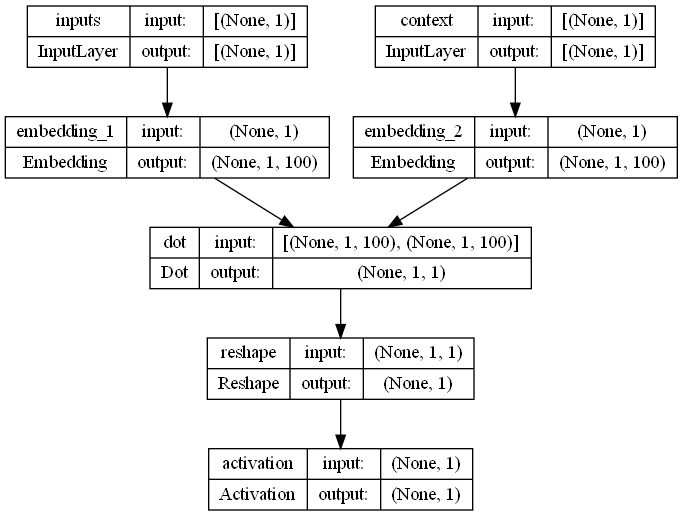

In [30]:
from keras.layers import Dot
from keras.layers import Input, Dense, Reshape, Activation
from keras.models import Model
from keras.layers import Embedding
from keras.models import Sequential

from keras.utils import plot_model

# inputs
w_inputs = Input(shape=(1, ), dtype='int32', name='inputs')
w = Embedding(vocab_size, embed_size)(w_inputs)

# context
c_inputs = Input(shape=(1, ), dtype='int32', name='context')
c  = Embedding(vocab_size, embed_size)(c_inputs)
o = Dot(axes=2)([w, c])
o = Reshape((1,), input_shape=(1, 1))(o)
o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=o)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

plot_model(SkipGram, to_file='../Imagenes/model_skip_gram.png', show_shapes=True)


Comprender el modelo de aprendizaje profundo anterior es bastante sencillo. Sin embargo, intentaremos resumir los conceptos centrales de este modelo en términos simples para facilitar la comprensión.

Tenemos un par de palabras de entrada para cada ejemplo de entrenamiento que consta de una palabra objetivo de entrada que tiene un identificador numérico único y una palabra de contexto que tiene un identificador numérico único. 

Si es una muestra positiva, la palabra tiene un significado contextual, es una palabra de contexto y nuestra etiqueta Y = 1, de lo contrario, si es una muestra negativa, la palabra no tiene significado contextual, es solo una palabra aleatoria y nuestra etiqueta Y = 0. 


Pasaremos cada uno de ellos a una capa de incrustación propia, que tiene un tamaño (vocab_size x embed_size) que nos dará densas incrustaciones de palabras para cada una de estas dos palabras (1 x embed_size para cada palabra). 


A continuación, usamos una capa de combinación para calcular el producto escalar de estas dos incrustaciones y obtener el valor del producto escalar.

Esto luego se envía a la capa sigmoidea densa que genera un 1 o un 0. Comparamos esto con la etiqueta real Y (1 o 0), calculamos la pérdida, retropropagamos los errores para ajustar los pesos (en la capa de incrustación) y repetimos este proceso para todos los pares (objetivo, contexto) para múltiples épocas. 

La siguiente figura intenta explicar lo mismo.


<figure>
<center>
<img src="../Imagenes/skip-gramar_plot.png" width="400" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura Nuroronal del modelo Skip-gram</p>
</figcaption>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)

### Entrena el modelo

In [31]:
for epoch in range(1, 2):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += SkipGram.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 11713.261865256354


In [32]:
## Recupera incrustaciones

In [33]:
# recuperando el incrustamiento (embedding)
weights = SkipGram.get_weights()[0]
weights = weights[2:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(12423, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
unto,0.034578,-0.051203,0.145106,0.078543,-0.075155,0.020545,-0.016553,0.033159,0.410757,0.024018,...,0.073163,0.047565,0.089462,-0.017896,-0.035168,0.126674,-0.023995,0.164076,0.568506,0.022788
lord,0.006605,0.127662,-0.046779,-0.090864,-0.066737,-0.061732,0.005102,0.042834,0.532815,-0.096463,...,-0.080407,-0.049061,0.106308,0.050071,0.065751,0.013481,-0.239759,0.103883,0.876746,-0.030444
thou,0.029204,0.198789,-0.073673,-0.113327,0.004451,-0.112743,0.010982,-0.053891,0.507341,-0.013927,...,0.002586,0.066966,-0.001517,0.043932,0.040694,-0.018305,-0.143495,0.019333,0.917363,-0.038200
thy,0.128967,0.148726,-0.020371,-0.027980,0.024352,-0.115234,-0.181328,-0.067762,0.533992,0.141182,...,-0.014721,0.071842,-0.061892,0.028698,-0.085677,-0.018613,-0.103979,-0.029727,0.670030,0.036811
god,0.070090,0.169723,-0.105508,0.040400,-0.066056,0.024618,-0.115808,-0.062504,0.421586,-0.041451,...,-0.037042,-0.013095,-0.045765,0.084777,0.166671,0.035618,-0.080629,0.045171,0.632277,-0.109651




<figure>
<center>
<img src="../Imagenes/incrustaciones_skip_gram.png" width="600" height="400" align="center"/>
</center>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)

## Palabras similares

In [34]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

similar_words

(12423, 12423)


{'god': ['every', 'tribe', 'wilt', 'according', 'give'],
 'jesus': ['wife', 'thereof', 'us', 'stood', 'wickedness'],
 'noah': ['bone', 'pharez', 'punish', 'wroth', 'dissolved'],
 'egypt': ['anger', 'righteous', 'thence', 'abraham', 'wives'],
 'john': ['alone', 'males', 'obey', 'strait', 'sitteth'],
 'gospel': ['privately', 'labourers', 'mephibosheth', 'believeth', 'sinner'],
 'moses': ['together', 'elders', 'arose', 'joseph', 'commandment'],
 'famine': ['clothes', 'causeth', 'reproach', 'fenced', 'laban']}

Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are both techniques used to reduce the dimensionality of data, but they have different underlying principles and serve different purposes.

# Principal Component Analysis (PCA):

    PCA is a linear dimensionality reduction technique. It aims to find a new set of orthogonal axes (principal components) that capture the maximum variance in the data.
    The first principal component explains the most significant variance, followed by the second principal component, and so on. It allows you to reduce the number of dimensions while preserving as much variance as possible.
    PCA is commonly used for feature extraction, data compression, and visualization.

Advantages of PCA:

    Efficient in handling high-dimensional data.
    Easily interpretable, as it generates orthogonal components that represent the most significant variance.

Limitations of PCA:

    PCA may not be effective in capturing nonlinear relationships in the data.
    It may lose important local structure information, leading to suboptimal visualizations in some cases.


# t-distributed Stochastic Neighbor Embedding (t-SNE):

    t-SNE is a nonlinear dimensionality reduction technique, primarily used for data visualization. It focuses on preserving local structure and similarity relationships between data points in the original high-dimensional space.
    It creates a probability distribution that models pairwise similarities between data points in high-dimensional space and a similar distribution in the low-dimensional space.
    t-SNE aims to map similar data points close together and dissimilar points far apart in the lower-dimensional representation, which helps in visualizing clusters and patterns in the data.

Advantages of t-SNE:

    Better at preserving local structures and detecting clusters in the data.
    Suitable for visualizing high-dimensional data in 2D or 3D plots.

Limitations of t-SNE:

    t-SNE is computationally more expensive than PCA, especially for large datasets.
    It may not be as suitable for feature extraction or data compression as PCA.

## Gráfico usando TSNE

Incrustación estocásticas de vecinos con distribución t-Student.

[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [Laurens van der Maaten and Geoffrey Hinton](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas y trata de minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda fuertemente utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o TruncatedSVD para datos escasos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de [Laurens van der Maaten](https://lvdmaaten.github.io/tsne/)

    n_components=2: This parameter specifies the number of dimensions in the reduced space. In this case, it's set to 2, which means the t-SNE model will project the high-dimensional data into a 2D space for visualization.

    random_state=0: This parameter is used to set the random seed for reproducibility. Setting it to a specific value (in this case, 0) ensures that the results will be the same every time the code is run with the same data and parameters. If you want different results each time, you can use a different random state value or leave it unspecified.

    n_iter=10000: This parameter specifies the number of iterations for the optimization process. t-SNE is an iterative technique that aims to find a low-dimensional representation of the data that minimizes the divergence between pairwise similarities in the high-dimensional and low-dimensional spaces. More iterations can lead to better results, but it may also take longer to compute.

    perplexity=3: Perplexity is a hyperparameter that balances the attention between preserving local and global structures in the data. A low perplexity value (e.g., 3) tends to emphasize preserving local structures, while a higher perplexity value might consider global structures. The choice of perplexity should be based on the characteristics of your data and the goals of your visualization. You may need to experiment with different values to find the best one for your specific use case.

Total words: 48 	Word Embedding shapes: (48, 100)


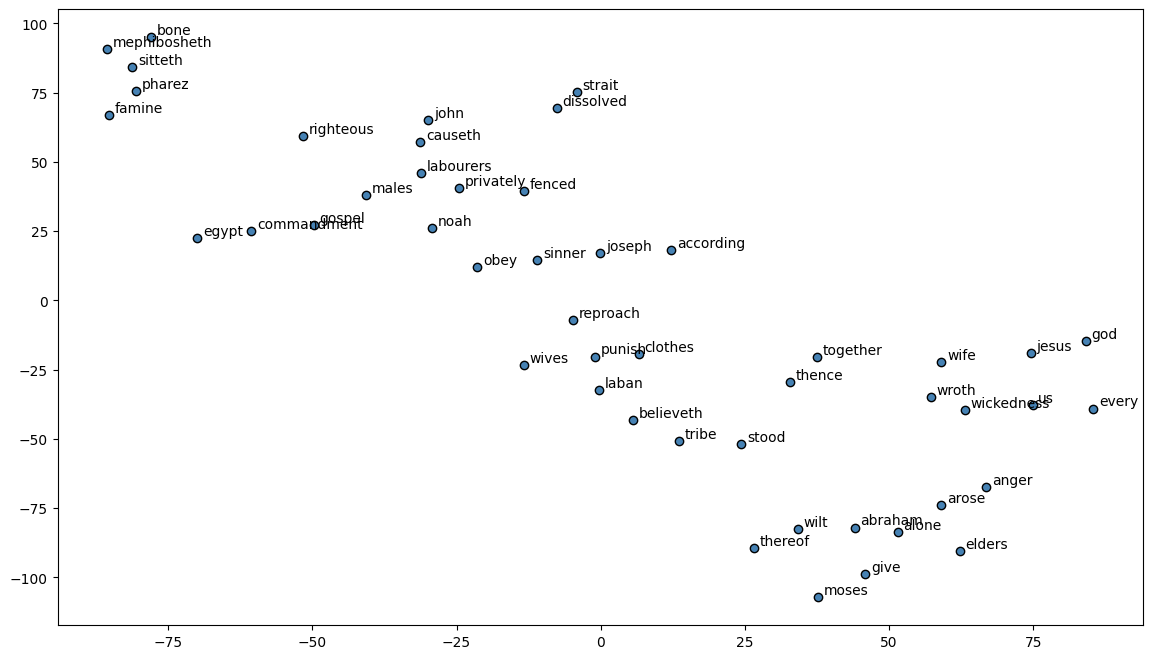

In [35]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


<figure>
<center>
<img src="../Imagenes/TSNK-Skip-gram.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Grafico TSNE de palabras similares</p>
</figcaption>
</figure>

Fuente: 
[Dipanjan (DJ) Sarkar](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)

## Gensim word2vec

El objeto word2vec de gensim puede usar CBOW o Skip-gram. Los autores de gensim tomaron el código original escritos por Mikolov y colegas, escrito en c++, lo optimizaron y volvieron caja negra. Según ellos gensim es 7 veces más rápido que la implementación que hicimos manualmente en otra lección, usando numpy.


In [36]:
!pip3 install gensim

In [37]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, epochs=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}
similar_words

{'god': ['lord', 'promised', 'worldly', 'us', 'godly'],
 'jesus': ['peter', 'messias', 'immediately', 'john', 'synagogue'],
 'noah': ['shem', 'japheth', 'ham', 'henoch', 'enosh'],
 'egypt': ['pharaoh', 'egyptians', 'flowing', 'bondage', 'lice'],
 'john': ['baptist', 'james', 'tetrarch', 'galilee', 'baptism'],
 'gospel': ['christ', 'faith', 'godly', 'hope', 'afflictions'],
 'moses': ['congregation', 'children', 'joshua', 'aaron', 'elisheba'],
 'famine': ['pestilence', 'peril', 'blasting', 'mildew', 'deaths']}

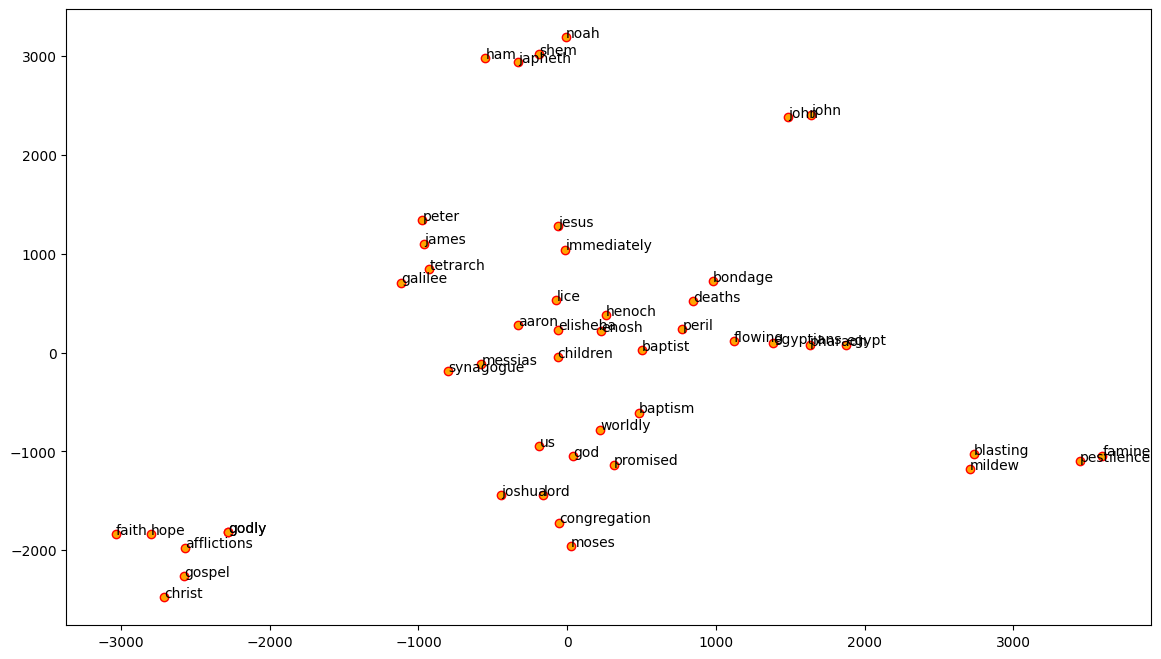

In [38]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Aplicación a etiquetado automático de textos

Para esta aplicación vamos a usar nuestro ejemplo de juguete.

In [39]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [41]:
# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, epochs=100)
                              

### Visualiza incrustaciones

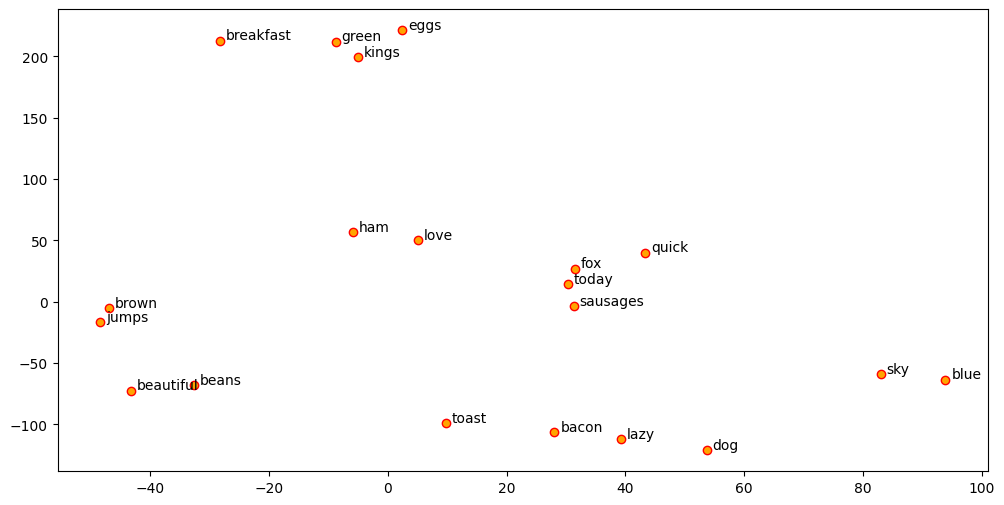

In [42]:

                              
# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Recuerde que nuestro corpus es extremadamente pequeño, por lo que para obtener incrustaciones de palabras significativas y para que el modelo obtenga más contexto y semántica, más datos ayudan.

Ahora bien, ¿qué es una palabra incrustada en este escenario? 

Por lo general, es un vector denso para cada palabra, como se muestra en el siguiente ejemplo para la palabra *sky.

In [43]:
w2v_model.wv['sky']

array([-0.00550217,  0.00225759,  0.05222183,  0.08953774, -0.09186712,
       -0.07102545,  0.06703831,  0.09108812, -0.05248048, -0.03727873],
      dtype=float32)

Ahora suponga que quisiéramos agrupar los ocho documentos de nuestro corpus de juguetes, necesitaríamos obtener las incrustaciones de nivel de documento de cada una de las palabras presentes en cada documento. 

Una estrategia sería promediar las incrustaciones de palabras para cada palabra en un documento. 

Esta es una estrategia extremadamente útil y puede adoptar la misma para sus propios problemas. Apliquemos esto ahora en nuestro corpus para obtener características para cada documento.

In [44]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model, num_features=feature_size)
          

In [45]:
                          
pp = pd.DataFrame(w2v_feature_array)
pp

,0,1,2,3,4,5,6,7,8,9
0,-0.002563,-0.007418,0.034811,0.026904,-0.053587,-0.035993,0.061499,0.014958,-0.047006,-0.059281
1,0.003990,-0.017028,0.047207,-0.004556,-0.022574,-0.019438,0.034795,0.022913,-0.040348,-0.027406
2,-0.025970,0.044765,-0.027590,-0.042492,0.038190,0.001035,0.020798,0.014793,-0.009800,0.026013
3,-0.004875,-0.023161,0.012324,0.017017,0.023751,0.013767,0.019178,-0.004341,0.008625,0.013524
4,0.002887,-0.026936,0.028622,0.022390,0.038068,0.033622,0.020794,0.024426,-0.022648,0.036913
5,0.000605,0.036747,-0.027230,-0.022999,0.024138,-0.010912,0.013114,0.026146,-0.036314,-0.000790
6,-0.000502,-0.007114,0.035939,0.018142,-0.055835,-0.030537,0.061412,0.022556,-0.058082,-0.034085
7,-0.013937,0.047206,-0.023748,-0.040617,0.038326,-0.009574,0.009073,0.029035,-0.026323,0.017736


Ahora que tenemos nuestras características para cada documento, agrupemos estos documentos utilizando el **algoritmo de propagación de afinidad**, que es un algoritmo de agrupación basado en el concepto de "paso de mensajes" entre puntos de datos y no necesita el número de agrupaciones como una entrada explícita que a menudo es requerido por algoritmos de agrupación en clústeres basadosen particiones.

In [46]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,1
7,The dog is lazy but the brown fox is quick!,animals,2


Finalmente hagamos un plot de los documentos usando un análisis de componentes principales (ACP).

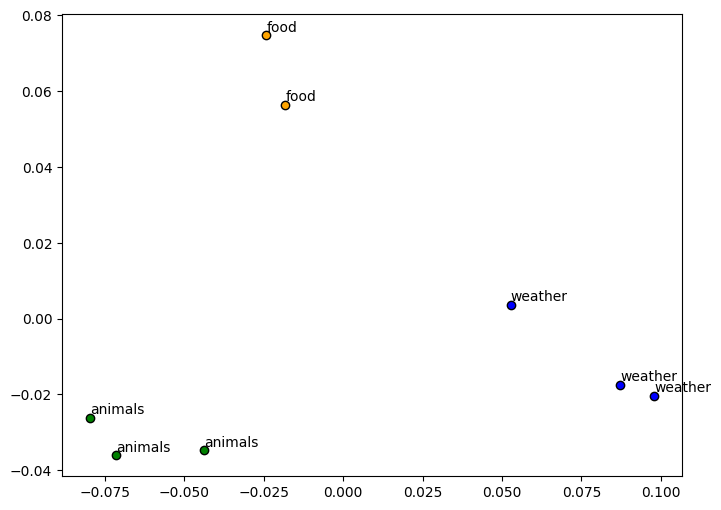

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')


## Referencias

1. Adaptado de [deep-learning-methods-for-text-data]((https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa))
2. Mikolov et al. 2013a, Google, [Distributed Representations of Words and Phrases
and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf), 
3. Xin Rong, 2016, [word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738.pdf), 
4. Mikolov et al. 2013b, Google, [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf).